# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [72]:
# Imports

import numpy as np
import pandas as pd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2.0 Carregando o dataframe SINASC

In [73]:
# Carrega o dataset
# Amostra de Dados
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [74]:
# Shape 
sinasc_raw.shape

(27028, 69)

In [75]:
# Colunas
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [76]:
# Info
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [80]:
sinasc1 = sinasc_raw[['munResNome','IDADEMAE', 'IDADEPAI']]
sinasc_1 = sinasc1.drop(sinasc1[sinasc1['munResNome']=='Municipio ignorado - RO'].index)
sinasc_1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [87]:
peso_aniversario = sinasc_raw[['PESO', 'DTNASC', 'SEXO','ESCMAE']]

In [88]:
# Filtrando pelo dia 19/Junho
peso_aniversario[peso_aniversario['DTNASC'] == '2019-06-19'].groupby(['DTNASC', 'ESCMAE', 'SEXO']).aggregate('mean')

PESO
DTNASC     ESCMAE          SEXO                  
2019-06-19 1 a 3 anos      Masculino  1925.000000
           12 anos ou mais Feminino   3092.750000
                           Masculino  3358.000000
           4 a 7 anos      Feminino   2976.250000
                           Masculino  3311.125000
           8 a 11 anos     Feminino   3284.542857
                           Masculino  3152.459459

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [89]:
sinasc_c = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome', ]]
mun_menos_nasc = sinasc_c.drop(sinasc_c[sinasc_c['munResNome']=='Município ignorado - RO'].index)

In [90]:
# Município com menos nascimentos
mun_menos_nasc = mun_menos_nasc.munResNome.value_counts().sort_values(ascending = True)[:1]
mun_menos_nasc

Castanheiras    32
Name: munResNome, dtype: int64

In [92]:
# Montando a pivot table
mun_menos_nasc = sinasc_raw['munResNome'][sinasc_raw['munResNome'] == 'Castanheiras']

sinasc_raw.pivot_table(values = ['IDADEMAE', 'IDADEPAI'],
                       index = mun_menos_nasc,
                       aggfunc ={'IDADEMAE':[('Mínimo','min'),('Máximo','max'),('Média','mean')],
                                 'IDADEPAI':[('Mínimo','min'),('Máximo','max'),('Média','mean')]})

IDADEMAE                  IDADEPAI                  
               Máximo     Média Mínimo   Máximo      Média Mínimo
munResNome                                                       
Castanheiras       39  27.28125     17     43.0  30.392857   17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [93]:
sinasc_3=sinasc_raw[['munResNome', 'QTDFILVIVO','IDADEMAE','IDADEPAI','DTNASC']]
mun_maior_nasc = sinasc_3.drop(sinasc_3[sinasc_3['munResNome']=='Municipio ignorado -RO'].index)

In [94]:
# Converte a coluna 'DTNASC' de string para data e hora
mun_maior_nasc.loc[:,'DTNASC'] = pd.to_datetime(mun_maior_nasc['DTNASC'])

In [95]:
mun_maior_nasc_2 = mun_maior_nasc.loc[(mun_maior_nasc['DTNASC'] >= '2019-03-01') & (mun_maior_nasc['DTNASC'] <= '2019-03-31')]

In [96]:
mun_maior_nasc_2.munResNome.value_counts()

Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Machadinho D'Oeste            44
Espigão D'Oeste               44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alto Paraíso                  22
Alvorada D'Oeste              22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14
Vale do Pa

In [97]:
#Calcula as estatísticas agregadas (média, mínimo e máximo) para cada coluna numérica
mun_maior_nasc_3 = mun_maior_nasc_2[mun_maior_nasc_2['munResNome'] == 'Porto Velho'].groupby('munResNome').aggregate(['mean', 'min', 'max'])
mun_maior_nasc_3

QTDFILVIVO             IDADEMAE           IDADEPAI              \
                  mean  min  max       mean min max       mean   min   max   
munResNome                                                                   
Porto Velho   1.295056  0.0  9.0  26.596774  14  44  34.629032  19.0  62.0   

                                   DTNASC                        
                                     mean        min        max  
munResNome                                                       
Porto Velho 2019-03-15 20:38:42.580645120 2019-03-01 2019-03-31

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

## Insight 1

Text(0.5, 0, 'Municípios')

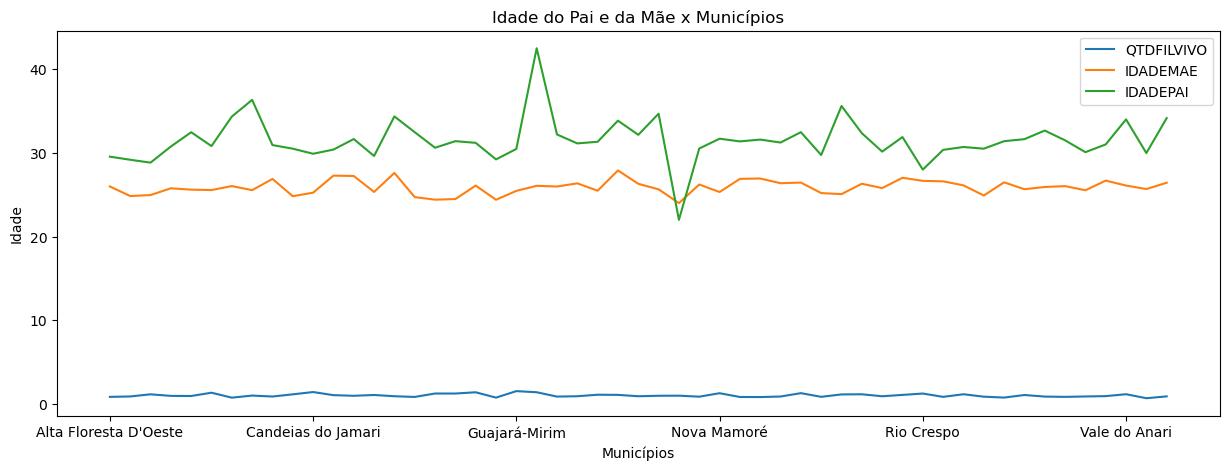

In [100]:
sinasc_3.groupby('munResNome').mean().plot(figsize=[15,5]);
plt.title('Idade do Pai e da Mãe x Municípios')
plt.ylabel('Idade')
plt.xlabel('Municípios')

. Observamos que a idade média dos pais é maior do que da idade média das mães, sendo somente ao contrário no múnicipio de nova Mamoré .

## Insight 2

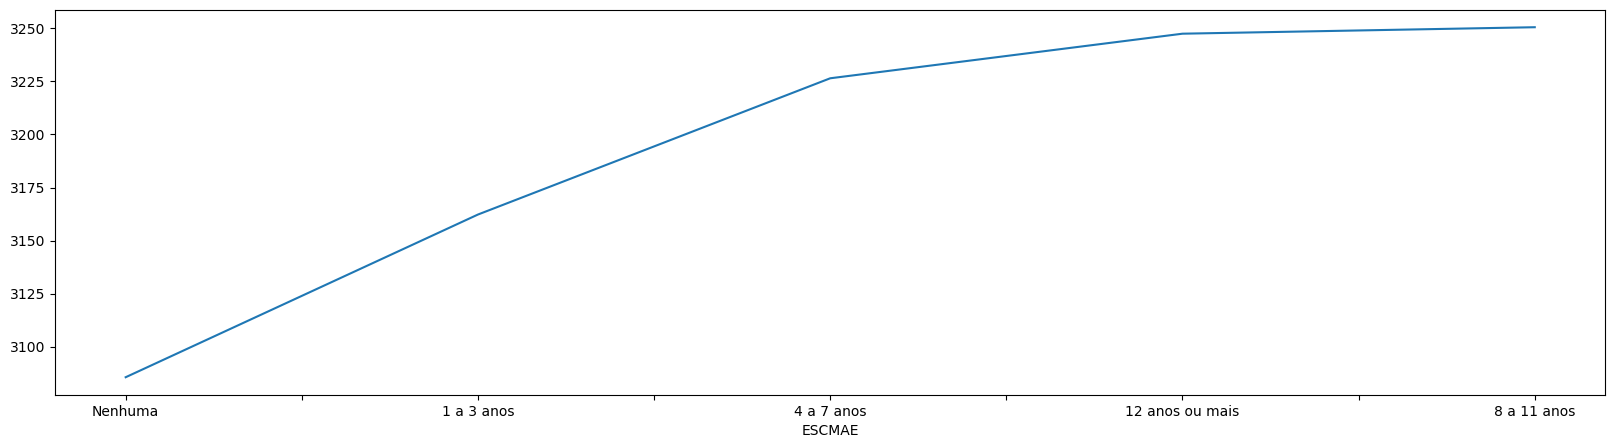

In [102]:
peso_aniversario.groupby(['ESCMAE'])['PESO'].mean().sort_values().plot(figsize=[20,5]);

Text(0, 0.5, 'Peso')

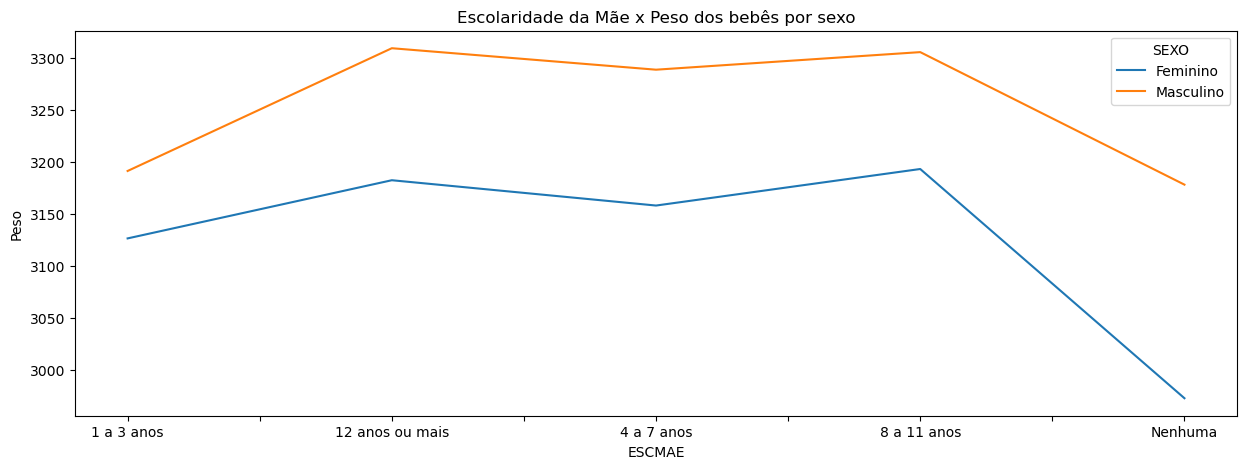

In [101]:
peso_aniversario.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);
plt.title('Escolaridade da Mãe x Peso dos bebês por sexo')
plt.ylabel('Peso')

. Podemos obsevar que os bebês do sexo masculino possuem uma tendência de nascer mais pesados do que os do sexo feminino
. Obsevamos também que quanto menor o grau de escolaridade da mãe, menor é o peso de nascimento do bebê.

## insight 3

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

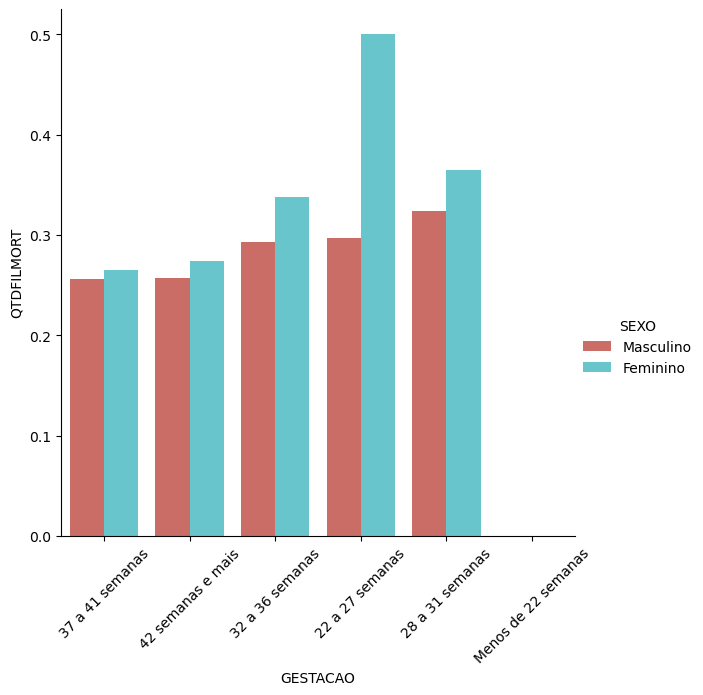

In [103]:
sns.catplot(
    data = sinasc_raw,
    kind = 'bar',
    x = 'GESTACAO',
    y = "QTDFILMORT",
    hue = 'SEXO',
    palette = 'hls',
    height = 6,
    ci = None
)
plt.xticks(rotation=45)

. O maior número de filhos mortos ocorre entre 22 a 27 semanas de gestação e são os bebês do sexo feminino.